In [1]:
import os

import numpy
import pandas

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import scipy.signal
import scipy.stats

import seaborn

import accels_utils.frame_accels as FA

In [2]:
# Constants
MICHELSEN_FREQS = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000]
MICHELSEN_DISPLS = [8.5, 1.5, 0.8, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.22, 0.17, 0.15, 0.15] # microns
MICHELSEN_SPEEDS = [x*2*3.14*MICHELSEN_FREQS[x_i]/1000 for x_i, x in enumerate(MICHELSEN_DISPLS)] # mm/s
MICHELSEN_ACCELS = [x*2*3.14*MICHELSEN_FREQS[x_i]/1000 for x_i, x in enumerate(MICHELSEN_SPEEDS)] # m/s/s

In [3]:
root_path = '/Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/'

data_folds = [
    'a0_x51_y50_w0/', 'a1_x51_y50_w0/', 'a2_x51_y50_w0/', 'a3_x51_y50_w0/', 'a4_x51_y50_w0/', 'a5_x51_y50_w0/', 'a6_x51_y50_w0/', 'a7_x51_y50_w0/',
    'a1_x141_y50_w0/', 'a2_x231_y50_w0/', 'a3_x321_y50_w0/', 'a4_x321_y150_w0/', 'a5_x231_y150_w0/', 'a6_x141_y150_w0/', 'a7_x51_y150_w0/'
]
data_paths = [root_path + fold for fold in data_folds]

POS_ACTS = {0:[51, 50], 1:[141, 50], 2:[231, 50], 3:[321, 50], 4:[321, 150], 5:[231, 150], 6:[141, 150], 7:[51, 150]}

files_params = []
for data_path in data_paths:
    data_path = data_path + 'csv_files/'
    files_list = sorted([x for x in os.listdir(data_path) if x.endswith('.csv')])
    print("Discovered {} files in {}".format(len(files_list), data_path))

    for f in files_list:
        fp = {}
        fp['filename']  = f
        fp['actuator']  = int(f.split('.')[0].split('_')[-4][1:])
        fp['frequency'] = int(f.split('.')[0].split('_')[-5][1:])
        fp['replicate'] = int(f.split('.')[0].split('_')[-6][1:])
        fp['x']         = int(f.split('.')[0].split('_')[-3][1:])
        fp['y']         = int(f.split('.')[0].split('_')[-2][1:])
        fp['wax']       = int(f.split('.')[0].split('_')[-1][1:])

        df = pandas.read_csv(data_path+f)
        fp['f_acq']     = 1/round(numpy.median(df['time'].values[1:]-df['time'].values[:-1]), 8)
        sig_fft         = numpy.fft.fft(df['CH1'].values-numpy.mean(df['CH1'].values))[0:int(len(df['CH1'].values)/2)]
        fre_fft         = numpy.fft.fftfreq(len(df['CH1'].values[1:]), 1/fp['f_acq'])[0:int(len(df['CH1'].values)/2)]
        peak_coeff      = numpy.argmax(numpy.abs(sig_fft))
        fp['computed_freq'] = fre_fft[peak_coeff]

        fp['V_to_mm_s'] = 5

        fp['ampl_V_pp']     = numpy.median(numpy.abs((scipy.signal.hilbert(df['CH1'].values))))*2
        fp['ampl_speed']    = fp['ampl_V_pp']*fp['V_to_mm_s'] # in mm/s
        fp['ampl_displ']    = fp['ampl_speed']/(2*3.14*fp['frequency'])*1000 # in microns
        fp['ampl_accel']    = fp['ampl_speed']*2*3.14*fp['frequency']/1000 # in m/s/s
    
        fp['actuator_measurement_position'] = [actu for actu in list(POS_ACTS.keys()) if POS_ACTS[actu]==[fp['x'],fp['y']]][0]
        fp['ontop']         = fp['actuator']==fp['actuator_measurement_position']
        fp['data_path']     = data_path
        files_params.append(fp)

data = pandas.DataFrame.from_dict(files_params)
data

Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a0_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a1_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a2_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a3_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a4_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a5_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matthieu/Documents/SurfaceVibMeasurementSystem/macos_version/data/calib_2024/3.2.4/a6_x51_y50_w0/csv_files/
Discovered 18 files in /Users/matt

,filename,actuator,frequency,replicate,x,y,wax,f_acq,computed_freq,V_to_mm_s,ampl_V_pp,ampl_speed,ampl_displ,ampl_accel,actuator_measurement_position,ontop,data_path
0,capt_r0_f1000_a0_x51_y50_w0.csv,0,1000,0,51,50,0,5000000.0,1000.0100,5,1.087675,5.438375,0.865983,34.152995,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
1,capt_r0_f100_a0_x51_y50_w0.csv,0,100,0,51,50,0,2000000.0,100.0010,5,0.060791,0.303957,0.484008,0.190885,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
2,capt_r0_f1250_a0_x51_y50_w0.csv,0,1250,0,51,50,0,5000000.0,1250.0125,5,1.074562,5.372810,0.684434,42.176559,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
3,capt_r0_f1500_a0_x51_y50_w0.csv,0,1500,0,51,50,0,5000000.0,1500.0150,5,1.309608,6.548038,0.695121,61.682518,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
4,capt_r0_f1750_a0_x51_y50_w0.csv,0,1750,0,51,50,0,5000000.0,1750.0175,5,0.812922,4.064611,0.369846,44.670078,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,capt_r0_f500_a7_x51_y150_w0.csv,7,500,0,51,150,0,1000000.0,500.0050,5,0.378165,1.890825,0.602174,5.937190,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
266,capt_r0_f600_a7_x51_y150_w0.csv,7,600,0,51,150,0,1000000.0,600.0060,5,0.195409,0.977043,0.259300,3.681500,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
267,capt_r0_f700_a7_x51_y150_w0.csv,7,700,0,51,150,0,1000000.0,700.0070,5,0.145325,0.726625,0.165292,3.194244,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
268,capt_r0_f800_a7_x51_y150_w0.csv,7,800,0,51,150,0,1000000.0,800.0080,5,0.340445,1.702226,0.338819,8.551981,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...


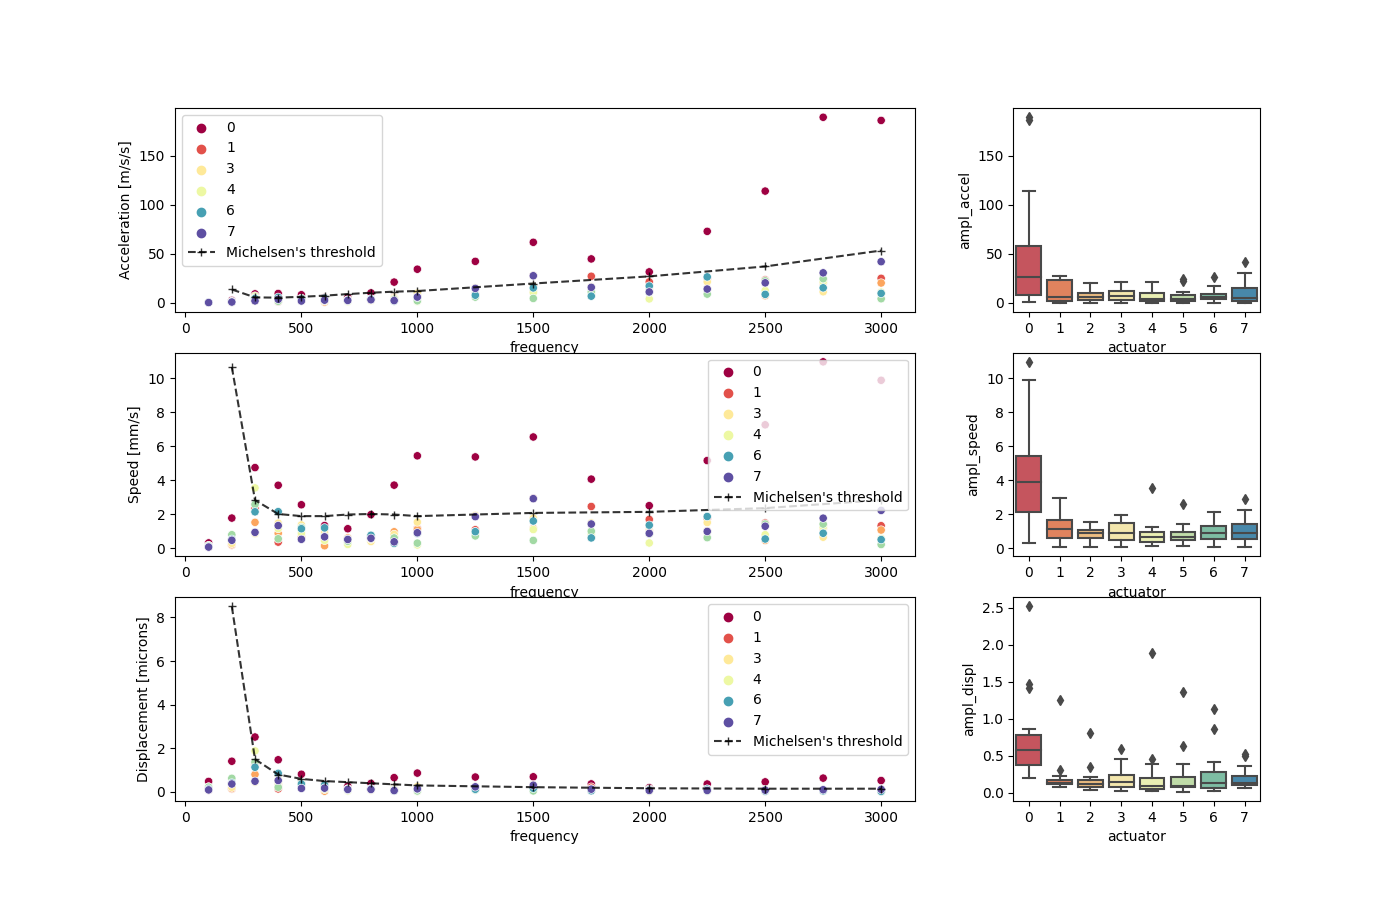

In [4]:
fig, ax = matplotlib.pyplot.subplots(3, 2, figsize=(14, 9), width_ratios=[75, 25])

dataset = data[data.x==51]
dataset = dataset[dataset.y==50]

palette_used = 'Spectral'
seaborn.scatterplot(data=dataset, x='frequency', y='ampl_accel', hue='actuator', ax=ax[0,0], palette=palette_used)
seaborn.scatterplot(data=dataset, x='frequency', y='ampl_speed', hue='actuator', ax=ax[1,0], palette=palette_used)
seaborn.scatterplot(data=dataset, x='frequency', y='ampl_displ', hue='actuator', ax=ax[2,0], palette=palette_used)
_ = ax[0,0].plot(MICHELSEN_FREQS, MICHELSEN_ACCELS, '+k', linestyle='dashed', alpha=0.8, label="Michelsen's threshold")
_ = ax[1,0].plot(MICHELSEN_FREQS, MICHELSEN_SPEEDS, '+k', linestyle='dashed', alpha=0.8, label="Michelsen's threshold")
_ = ax[2,0].plot(MICHELSEN_FREQS, MICHELSEN_DISPLS, '+k', linestyle='dashed', alpha=0.8, label="Michelsen's threshold")

seaborn.boxplot(data=dataset, x='actuator', y='ampl_accel', ax=ax[0,1], palette=palette_used)
seaborn.boxplot(data=dataset, x='actuator', y='ampl_speed', ax=ax[1,1], palette=palette_used)
seaborn.boxplot(data=dataset, x='actuator', y='ampl_displ', ax=ax[2,1], palette=palette_used)

_ = ax[0,0].set_ylabel('Acceleration [m/s/s]')
_ = ax[1,0].set_ylabel('Speed [mm/s]')
_ = ax[2,0].set_ylabel('Displacement [microns]')

_ = ax[0,0].legend()
_ = ax[1,0].legend()
_ = ax[2,0].legend()

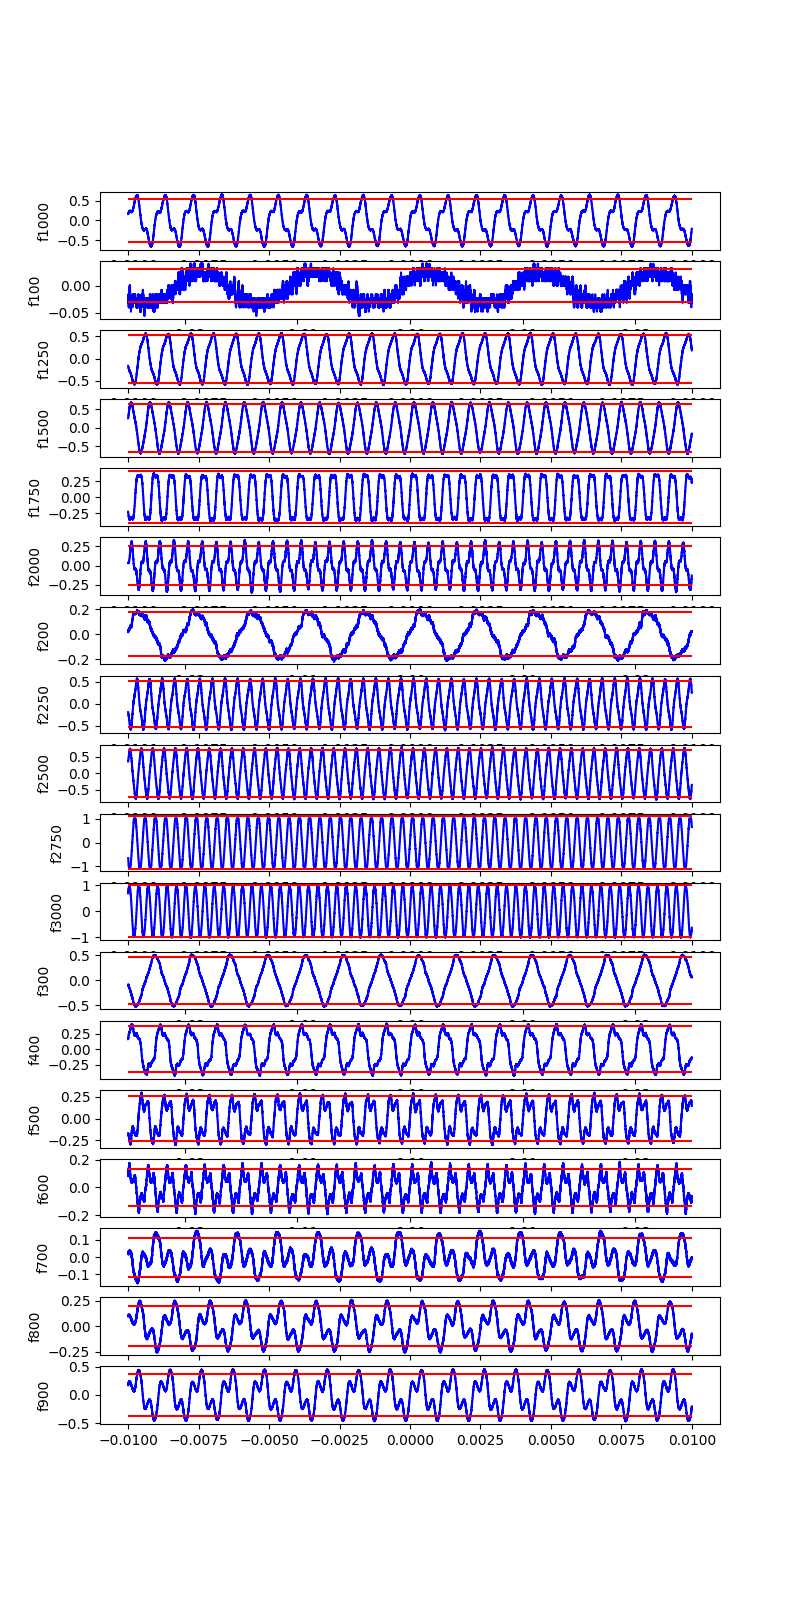

In [5]:
data_a0 = dataset[dataset.actuator == 0]
fig, ax = matplotlib.pyplot.subplots(18, 1, figsize=(8, 16))
for i, exp in data_a0.iterrows():
    f = exp.filename
    df = pandas.read_csv(exp.data_path+f)
    ax[i].plot(df['time'], df['CH1'], 'b')
    computed_amp = exp.ampl_V_pp
    ax[i].hlines([computed_amp/2, -computed_amp/2], df['time'].values[0], df['time'].values[-1], 'r')
    ax[i].set_ylabel('f{}'.format(exp.frequency))

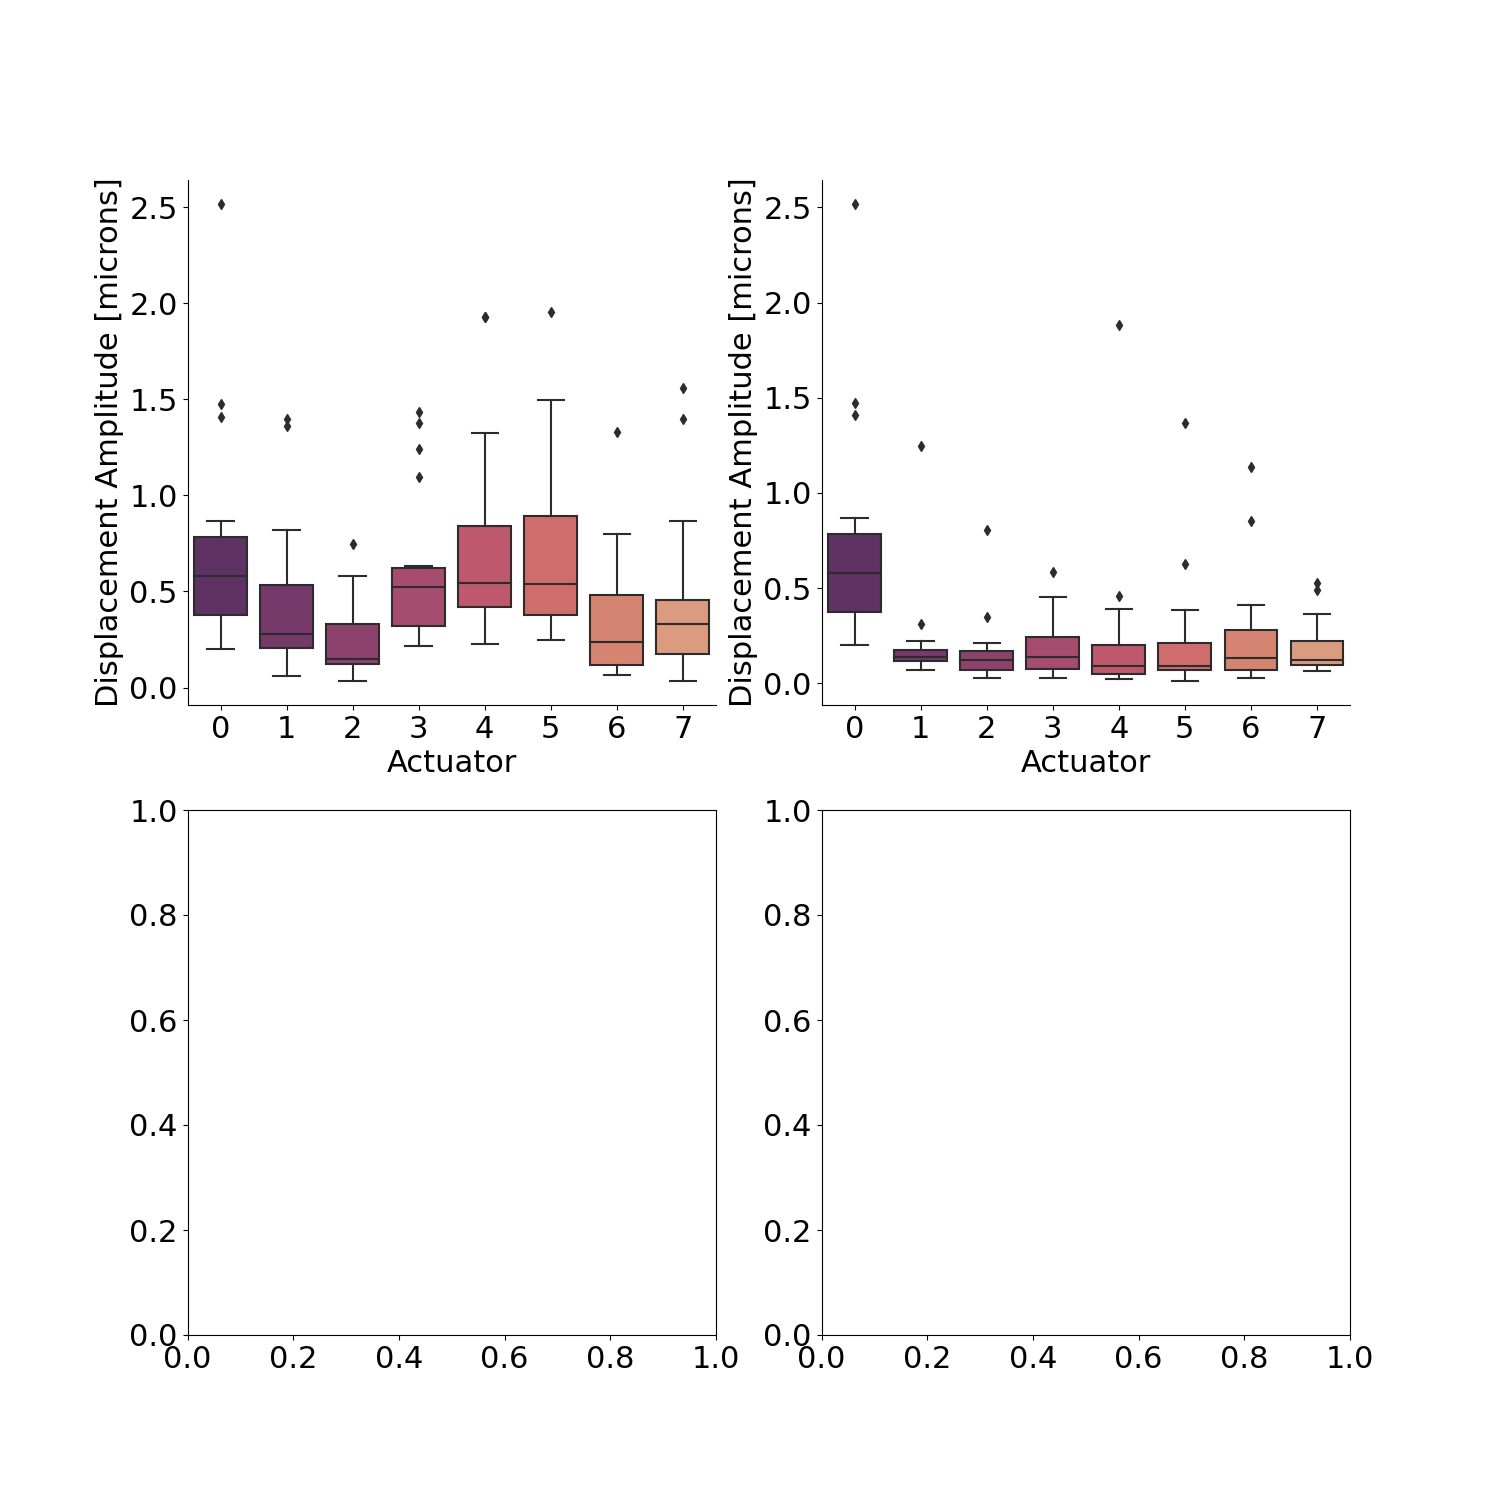

In [6]:
dataset_ontop = data[data.actuator == data.actuator_measurement_position]
dataset_ona0  = data[data.actuator_measurement_position == 0]

matplotlib.rcParams.update({'font.size': 22})

seaborn.set_palette(reversed(seaborn.color_palette("flare", 8)), 8)
fig, ax = matplotlib.pyplot.subplots(2, 2, figsize=(15, 15), width_ratios=[50, 50])


dataset = data[data.x==51]
dataset = dataset[dataset.y==50]

palette_used = 'Spectral'

_ = seaborn.boxplot(data=dataset_ontop, x='actuator', y='ampl_displ', ax=ax[0,0])
_ = seaborn.boxplot(data=dataset_ona0, x='actuator', y='ampl_displ', ax=ax[0,1])

_ = ax[0,0].set_xlabel("Actuator")
_ = ax[0,1].set_xlabel("Actuator")
_ = ax[0,0].set_ylabel("Displacement Amplitude [microns]")
_ = ax[0,1].set_ylabel("Displacement Amplitude [microns]")

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)

ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)

In [7]:
print(seaborn.color_palette("flare", 8).as_hex())

['#ea9570', '#e67961', '#de5d5c', '#ce4763', '#b43d6b', '#9a3670', '#7f2f70', '#642a6a']


In [8]:
dataset_ona0  = data[data.actuator_measurement_position == 0]

for freq_i, freq in enumerate(MICHELSEN_FREQS):
    data_oi = dataset_ona0[dataset_ona0.frequency == freq]

    count_ok = 0
    for r_id, row in data_oi.iterrows():
        if row.ampl_displ < 0.8*MICHELSEN_DISPLS[freq_i]:
            count_ok += 1
    print(freq, count_ok)

200 8
300 4
400 6
500 7
600 8
700 8
800 7
900 7
1000 6
1500 4
2000 7
2500 7
3000 7


In [9]:
data

,filename,actuator,frequency,replicate,x,y,wax,f_acq,computed_freq,V_to_mm_s,ampl_V_pp,ampl_speed,ampl_displ,ampl_accel,actuator_measurement_position,ontop,data_path
0,capt_r0_f1000_a0_x51_y50_w0.csv,0,1000,0,51,50,0,5000000.0,1000.0100,5,1.087675,5.438375,0.865983,34.152995,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
1,capt_r0_f100_a0_x51_y50_w0.csv,0,100,0,51,50,0,2000000.0,100.0010,5,0.060791,0.303957,0.484008,0.190885,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
2,capt_r0_f1250_a0_x51_y50_w0.csv,0,1250,0,51,50,0,5000000.0,1250.0125,5,1.074562,5.372810,0.684434,42.176559,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
3,capt_r0_f1500_a0_x51_y50_w0.csv,0,1500,0,51,50,0,5000000.0,1500.0150,5,1.309608,6.548038,0.695121,61.682518,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
4,capt_r0_f1750_a0_x51_y50_w0.csv,0,1750,0,51,50,0,5000000.0,1750.0175,5,0.812922,4.064611,0.369846,44.670078,0,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,capt_r0_f500_a7_x51_y150_w0.csv,7,500,0,51,150,0,1000000.0,500.0050,5,0.378165,1.890825,0.602174,5.937190,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
266,capt_r0_f600_a7_x51_y150_w0.csv,7,600,0,51,150,0,1000000.0,600.0060,5,0.195409,0.977043,0.259300,3.681500,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
267,capt_r0_f700_a7_x51_y150_w0.csv,7,700,0,51,150,0,1000000.0,700.0070,5,0.145325,0.726625,0.165292,3.194244,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
268,capt_r0_f800_a7_x51_y150_w0.csv,7,800,0,51,150,0,1000000.0,800.0080,5,0.340445,1.702226,0.338819,8.551981,7,True,/Users/matthieu/Documents/SurfaceVibMeasuremen...
